# 🌍 [예시 주제] 지진은 어디에서 자주 발생할까?(예시)

USGS(미국 지질조사국) 데이터를 이용해 **아시아 지역의 지진 분포**를 시각화하고, 
**지진 규모의 빈도**를 분석하는 실습 과제입니다.

## 🧭 실습 목표
(여러분들의 아이디어를 추가)
- 전 세계 지진 데이터 중 아시아 지역(위도 20~50, 경도 120~150)을 필터링
- 지도에 지진 위치 표시 (folium)
- 지진 규모의 분포를 히스토그램으로 시각화 (seaborn)


In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 🌐 지진 데이터 불러오기 (7일간 규모 1.0 이상)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv"
df = pd.read_csv(url)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-16T15:04:21.730Z,38.825832,-122.802834,3.07,1.08,md,18.0,37.0,0.006157,0.01,...,2025-05-16T15:05:58.298Z,"7 km NNW of The Geysers, CA",earthquake,0.25,0.59,0.16,19.0,automatic,nc,nc
1,2025-05-16T15:02:11.747Z,65.526700,-148.835700,13.50,1.00,ml,NaN,NaN,NaN,1.18,...,2025-05-16T15:04:23.609Z,"13 km W of Livengood, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
2,2025-05-16T14:44:03.108Z,63.123200,-150.683600,121.50,1.50,ml,NaN,NaN,NaN,0.27,...,2025-05-16T14:46:21.252Z,"69 km SE of Denali National Park, Alaska",earthquake,NaN,0.90,NaN,NaN,automatic,ak,ak
3,2025-05-16T14:37:25.480Z,40.277500,-124.682663,0.29,2.83,md,23.0,280.0,0.260400,0.18,...,2025-05-16T14:47:26.501Z,"34 km W of Petrolia, CA",earthquake,5.19,8.33,0.18,20.0,automatic,nc,nc
4,2025-05-16T14:27:42.250Z,38.837334,-122.836334,1.03,1.31,md,21.0,80.0,0.001417,0.03,...,2025-05-16T14:47:25.502Z,"10 km NW of The Geysers, CA",earthquake,0.19,0.49,0.13,23.0,automatic,nc,nc


In [ ]:
# 아시아 인근 지역 필터링
df_asia = df[(df['latitude'] > 20) & (df['latitude'] < 50) &
             (df['longitude'] > 120) & (df['longitude'] < 150)]
df_asia = df_asia.dropna(subset=['mag'])  # 규모 없는 행 제거
df_asia[['latitude', 'longitude', 'mag']].head()

,latitude,longitude,mag
9,42.7921,144.6143,4.2
54,27.6460,139.8743,4.3
140,42.7988,143.3203,5.0
295,33.5992,140.5553,4.5
415,23.3097,120.5184,4.0


In [4]:
# 지도 위에 지진 위치 시각화 (folium)
map = folium.Map(location=[35, 135], zoom_start=4)

for _, row in df_asia.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['mag'] * 1.5,
        color='red' if row['mag'] > 5 else 'orange',
        fill=True,
        fill_opacity=0.6
    ).add_to(map)

map.save("earthquakes_map.html")
print("✅ 지진 위치 지도가 'earthquakes_map.html'로 저장되었습니다.")

✅ 지진 위치 지도가 'earthquakes_map.html'로 저장되었습니다.


/Users/pkd/HanaTI/2025-glocal-mentoring/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pkd/HanaTI/2025-glocal-mentoring/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pkd/HanaTI/2025-glocal-mentoring/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pkd/HanaTI/2025-glocal-mentoring/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pkd/HanaTI/2025-glocal-mentoring/.venv/lib/python3.11/si

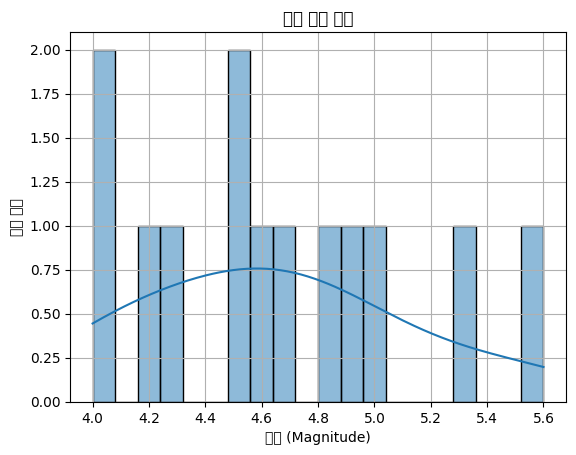

In [5]:
# 📊 지진 규모 분포 시각화 (히스토그램)
sns.histplot(df_asia['mag'], bins=20, kde=True)
plt.title("지진 규모 분포")
plt.xlabel("규모 (Magnitude)")
plt.ylabel("발생 빈도")
plt.grid(True)
plt.show()

## 📝 자유 탐구 추가 아이디어
- 다른 지역(예: 칠레, 알래스카 등)으로 필터링 조건을 바꿔 비교
- 지진이 자주 일어난 위치만 클러스터
- 규모가 큰 지진만 따로 표시하는 지도 생성
- `folium.Popup()`을 사용해 각 지진의 위치에 설명을 추가